In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
from scipy import stats
import math

# 計算sigma

In [5]:
baba_price=baba.history(interval='1d',period='2y')

In [6]:
baba_closeprice=baba_price['Close']

In [7]:
list_closeprice=list(baba_closeprice)

In [8]:
list_lograte=[]
for x in range(len(list_closeprice)-1):
     list_lograte.append(math.log(list_closeprice[x]/list_closeprice[x+1]))

In [27]:
list_lograte

[0.011495999426793909,
 0.03477200138598981,
 0.05403781654268827,
 -0.017156671720094375,
 0.028550259913876788,
 0.0179784521259198,
 0.006430890330290331,
 0.0012265741372120115,
 0.015165130895955056,
 0.009290057848162388,
 0.012053639137329895,
 -0.004345423552355619,
 -0.027890976284563683,
 0.016350920850300057,
 0.000989568937782593,
 -0.017859342084218865,
 -0.035790946654975994,
 -0.017364701705283803,
 0.016176873356051228,
 -0.0018104605834316327,
 0.01400641980044538,
 -0.011383397051578387,
 -0.03442040289071445,
 0.0003020684241138766,
 -0.016721454185820658,
 0.004169136127505326,
 -0.0032772443260752106,
 0.013776815615953262,
 -0.01905731297313074,
 -0.011238980327000825,
 0.008520674364308728,
 -0.03251378479103291,
 -0.0022824198010254477,
 0.004455615677971064,
 0.00787425462612219,
 0.0283852625953783,
 -0.0020756485051269956,
 0.011140081249683244,
 0.0022789360282456086,
 -0.015017290706441434,
 -0.025864725717410723,
 -0.003969072118222192,
 -0.003610243542976

In [9]:
sigma_baba=np.std(list_lograte,ddof=1)*np.sqrt(252)

In [10]:
sigma_baba

0.3772881789096597

# 無風險利率

In [11]:
r=0.017

# 現貨價格

In [16]:
st=209.53

# 取出option數據

In [2]:
tickername='BABA'
baba=yf.Ticker(tickername)

In [55]:
baba_option=list(baba.options)

In [56]:
baba_option=baba_option[0:12]

In [57]:
baba_option

['2021-05-21',
 '2021-05-28',
 '2021-06-04',
 '2021-06-11',
 '2021-06-18',
 '2021-06-25',
 '2021-07-02',
 '2021-07-16',
 '2021-08-20',
 '2021-09-17',
 '2021-10-15',
 '2021-11-19']

In [47]:
time_diff=[4,11,18,25,32,39,46,60,90,121,151,186]

In [74]:
df_call= pd.DataFrame(columns = ["strike", "lastPrice", "volume", "time"])

In [75]:
for i in range(len(baba_option)):
     baba03=baba.option_chain(baba_option[i])
     baba_call=pd.concat([baba03.calls['strike'],baba03.calls['lastPrice'],baba03.calls['volume']],axis=1)
     baba_call['time']=time_diff[i]
     baba_call_choose=baba_call[baba_call['volume']>1000]
     df_call=df_call.append(baba_call_choose)

In [76]:
df_call

,strike,lastPrice,volume,time
19,207.5,5.10,1471.0,4
20,210.0,3.75,9491.0,4
21,212.5,2.62,3412.0,4
22,215.0,1.82,3425.0,4
23,217.5,1.18,1998.0,4
24,220.0,0.82,7832.0,4
25,222.5,0.58,2838.0,4
26,225.0,0.38,2658.0,4
28,230.0,0.21,10299.0,4
32,240.0,0.10,1268.0,4


In [110]:
len(df_call)

36

In [77]:
df_put= pd.DataFrame(columns = ["strike", "lastPrice", "volume", "time"])

In [78]:
for i in range(len(baba_option)):
     baba03=baba.option_chain(baba_option[i])
     baba_put=pd.concat([baba03.puts['strike'],baba03.puts['lastPrice'],baba03.puts['volume']],axis=1)
     baba_put['time']=time_diff[i]
     baba_put_choose=baba_put[baba_put['volume']>1000]
     df_put=df_put.append(baba_put_choose)

In [79]:
df_put

,strike,lastPrice,volume,time
24,195.0,0.54,5370.0,4
25,200.0,1.05,5100.0,4
26,205.0,2.18,3105.0,4
27,207.5,3.05,1357.0,4
28,210.0,4.27,1672.0,4
29,212.5,5.65,1719.0,4
32,220.0,11.49,1228.0,4
12,185.0,0.89,3124.0,18
27,160.0,0.51,2649.0,32
28,165.0,0.59,1161.0,32


# call and put

In [14]:
def call(k,t):
    d1=(math.log(st/k)+(r+0.5*sigma_baba** 2)*t)/(sigma_baba*math.sqrt(t))
    d2=d1-sigma_baba*math.sqrt(t)
    p1=stats.norm.cdf(d1)
    p2=stats.norm.cdf(d2)
    c=st*p1-k*math.exp(-r*t)*p2
    return c

In [20]:
def put(k,t):
    d1=(math.log(st/k)+(r+0.5*sigma_baba** 2)*t)/(sigma_baba*math.sqrt(t))
    d2=d1-sigma_baba*math.sqrt(t)
    p1=stats.norm.cdf(-d1)
    p2=stats.norm.cdf(-d2)
    p=k*math.exp(-r*t)*p2-st*p1
    return p

In [86]:
c_theory=[]
for i in range(len(df_call)):
     k=df_call.iloc[i,0]
     t=df_call.iloc[i,3]/365
     c_theory.append(call(k,t))

In [87]:
c_theory

[4.422425642851948,
 3.0937213774840586,
 2.062593274588451,
 1.3070359129326619,
 0.7856156496188618,
 0.44724640239045854,
 0.24093094270264181,
 0.12275492510202923,
 0.026958221346295996,
 0.0006749599032603998,
 3.7974259267477976e-08,
 5.299383458207458,
 3.2710878220494806,
 1.8863859678098862,
 5.33010719052001,
 3.9256984934143375,
 2.8353770081339604,
 2.0089972003049326,
 1.3970905547912835,
 0.6401747993346767,
 0.27410895273646396,
 0.005186920901361969,
 12.828811580671854,
 8.731288288791575,
 5.72965603028269,
 3.6316455311116442,
 0.5783247862047176,
 1.302532958646598e-06,
 5.951717124500689,
 4.129148700108267,
 2.815164181218748,
 1.248905913229061,
 18.449247945046764,
 7.060602258601676,
 8.975080846954036,
 0.01324123898514426]

In [102]:
c_series=pd.DataFrame(c_theory,columns=['c_theory'])

In [18]:
call(210,4/365)

3.0937213774840586

In [22]:
put(220,4/365)

10.876263918685538

In [91]:
p_theory=[]
for i in range(len(df_put)):
     k=df_put.iloc[i,0]
     t=df_put.iloc[i,3]/365
     p_theory.append(call(k,t))

In [92]:
p_theory

[14.673478885157067,
 10.036516672662941,
 6.045063656795833,
 4.422425642851948,
 3.0937213774840586,
 2.062593274588451,
 0.44724640239045854,
 25.17227365765956,
 49.819385285554375,
 44.89173547725704,
 30.640225711774832,
 9.258325201264341,
 7.095076955885403,
 5.33010719052001,
 32.44647008898065,
 28.454636026685733,
 12.828811580671854,
 42.477974227609565,
 18.449247945046764,
 14.26747039860517,
 10.875761690085014,
 80.7816163978262,
 63.10064448243904]

In [100]:
p_series=pd.DataFrame(p_theory,columns=['p_theory'])

# 最終結果

In [129]:
call_strike = df_call['lastPrice'].reset_index()

In [130]:
del call_strike['index']

In [131]:
call_price=pd.concat([call_strike,c_series],axis=1)
call_price

,lastPrice,c_theory
0,5.10,4.422426e+00
1,3.75,3.093721e+00
2,2.62,2.062593e+00
3,1.82,1.307036e+00
4,1.18,7.856156e-01
5,0.82,4.472464e-01
6,0.58,2.409309e-01
7,0.38,1.227549e-01
8,0.21,2.695822e-02
9,0.10,6.749599e-04


In [132]:
put_strike = df_put['lastPrice'].reset_index()
del put_strike['index']
put_price=pd.concat([put_strike,p_series],axis=1)
put_price

,lastPrice,p_theory
0,0.54,14.673479
1,1.05,10.036517
2,2.18,6.045064
3,3.05,4.422426
4,4.27,3.093721
5,5.65,2.062593
6,11.49,0.447246
7,0.89,25.172274
8,0.51,49.819385
9,0.59,44.891735


# t 檢驗

In [147]:
stats.ttest_rel(call_price.iloc[:,0],call_price.iloc[:,1])

Ttest_relResult(statistic=-3.0466990722892078, pvalue=0.004380638488562789)

In [149]:
stats.ttest_rel(put_price.iloc[:,0],put_price.iloc[:,1])

Ttest_relResult(statistic=-2.92218611466489, pvalue=0.007892613701294572)

call option 具備顯著性差異， put option 具備顯著性差異

In [159]:
stats.ttest_rel(call_price.iloc[:18,0],call_price.iloc[:18,1])

Ttest_relResult(statistic=0.1915763212695212, pvalue=0.8503436493840045)

當 call option 在1個月左右時不具備顯著性，當時間擴大到半年則具備明顯顯著性
在期權定價上面對於一個月的定價較為合理，但是在兩個月以上的BMSmodel逐漸失效，偏離實際定價，因此我們不能使用其去計算期權價格對於未來市場的價格我們很難進行預測

# 希臘字母分析與繪圖

In [161]:
import matplotlib.pyplot as plt

Strike price and option price  

In [163]:
strike_price=range(200,250)

In [164]:
option_price=[]
for i in strike_price:
     option_price.append(call(i,30/365))

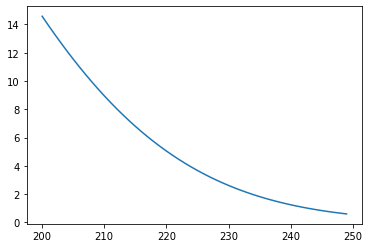

In [166]:
plt.plot(strike_price,option_price)
plt.show()

In [167]:
option_price_put=[]
for i in strike_price:
     option_price_put.append(put(i,30/365))

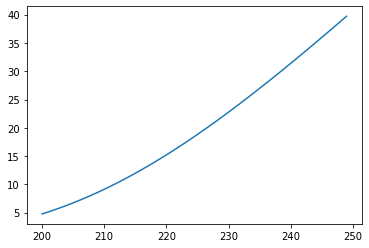

In [168]:
plt.plot(strike_price,option_price_put)
plt.show()

t and option price

In [177]:
t=np.arange(0.1,1,0.05)

In [182]:
option_price_t=[]

In [183]:
for i in t:
     option_price_t.append(call(220,i))

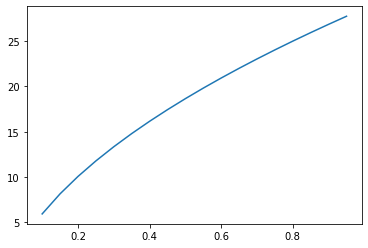

In [184]:
plt.plot(t,option_price_t)
plt.show()

In [185]:
option_price_put_t=[]

In [188]:
for i in t:
     option_price_put_t.append(put(220,i))

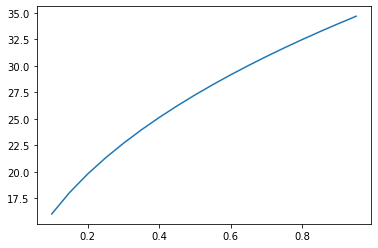

In [189]:
plt.plot(t,option_price_put_t)
plt.show()